### 导入需要的库

In [32]:
import pandas as pd
import numpy as np
import requests
from lxml import etree
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import time
import os
import warnings
warnings.filterwarnings('ignore')

### 爬取正点财经的研究报告界面

In [34]:
data = []
#爬取10个页面
for i in range(1, 11):
    url = 'http://www.zdcj.net/reportlist/newreport_{}.html'.format(i)
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64)"}
    MyPage = requests.get(url, headers=headers)
    MyPage.encoding="utf-8"
    dom = etree.HTML(MyPage.text)
    listnews = dom.xpath('//a[@title][@target="_blank"]/@href')
    count=0
    i=0
    while i<len(listnews):
        count=count+1
        news=listnews[i]
        news1=listnews[i+1]
        news2=listnews[i+2]
        news3=listnews[i+3]
        #第一个
        headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64)"}
        MyPage = requests.get(news, headers=headers)
        dom = etree.HTML(MyPage.text.encode("latin1").decode("GBK"))
        items = dom.xpath('//div[@class="v_c_box"]/p/text()')
        items = "".join(items)
        headers1 = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64)"}
        #第二个
        MyPage1 = requests.get(news1, headers=headers1)
        dom1 = etree.HTML(MyPage1.text.encode("latin1").decode("GBK"))
        items1 = dom1.xpath('//div[@class="v_c_box"]/p/text()')
        items1 = "".join(items1)
        #第三个
        headers2 = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64)"}
        MyPage2 = requests.get(news2, headers=headers2)
        dom2 = etree.HTML(MyPage2.text.encode("latin1").decode("GBK"))
        items2 = dom2.xpath('//div[@class="v_c_box"]/p/text()')
        items2 = "".join(items2)
        #第四个
        headers3 = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64)"}
        MyPage3 = requests.get(news3, headers=headers3)
        dom3 = etree.HTML(MyPage3.text.encode("latin1").decode("GBK"))
        items3 = dom3.xpath('//div[@class="v_c_box"]/p/text()')
        items3 = "".join(items3)
        items=items+items1
        if items:
            data.append(items)
        i=i+4
#爬取的内容放到data.csv
df = pd.DataFrame({'content': data}, columns=['content'])
df.to_csv('./data.csv')

### 读取数据

In [7]:
txt=pd.read_csv('data.csv')

### 进行数据预处理

In [8]:
txt['content'] = txt['content'].str.replace('\r','')
txt['content'] = txt['content'].str.replace('\n','')
txt['content'] = txt['content'].str.replace('\t','')
txt['content']=txt['content'].str.replace('  ','')
txt['content']=txt['content'].str.strip()
txt = txt['content'].str.replace(' ','')

In [9]:
#得到句子
sent=txt.str.split('。|\s')
sent[0]=list(set(sent[0]))

### 查看前四篇文章的所有句子，接下来就要从这四篇文章采用6种不同的方法生成一篇摘要

In [10]:
sent[0]

['',
 '直升机需求不断扩大，军民融合市场空间广阔军改后陆军航空兵扩编和海军陆战队建设，我国军用直升机需求不断扩大',
 '根据绝对/相对估值法，给予公司12.60~14.50元的合理估值区间',
 '公司作为直升机行业龙头，将受益于整个行业的向好发展',
 '我国直升机制造业的主力军，自主研发助推新品交付与民品替代中直主营航空产品直升机，现有核心产品包括直8、直9、直11、AC311、AC312、AC313等型号直升机及零部件，近年来已逐步完成主要产品型号的更新换代',
 'EQT股权转让完成，新战略股东有望带来新变化',
 '由于其投资产品已到退出期限，本次股权转让退出实属正常的退出安排',
 '股权转让落地解除减持预期对股价的压制',
 '首次覆盖太阳纸业并给予公司“买入”评级',
 '点评：',
 '市场担忧减持对公司股价造成较大波动，预计该担忧部分影响了公司的股价表现',
 '参考美国陆军直升机的编制情况，我们预测未来我国陆军直升机需求达到1500架,市场空间约为1800亿元；根据《通用航空“十三五”规划》，我们预测国内民用直升机到2020年约有600架的缺口，公司民机业务有望提升',
 '盈利预测及估值',
 '其中泽星投资持有公司24.78%的股权，买方则由春华资本和方源资本各持股50%',
 '公司业绩稳健成长，经营逐步改善，本次股权转让引入知名PE，有望为公司经营带来积极变化，维持“买入”评级',
 '本次公司公告了哈飞集团、中直有限的简化版财务报表，按照同一控制下企业合并的规则，2016-2018年股东中航科工的营收将分别增厚184.82/149.44/191.30亿元，净利润将分别增厚1.76/6.14/2.08亿元，归母净利润将分别增厚2.07/3.90/1.79亿元',
 '在民机科研方面，公司深入开展“一机首飞”、“一机论证”、“两机取证”',
 '据东方网10月1日消息，在我国国庆70周年阅兵表演中直20首次公开亮相',
 '公司有望凭借老挝和广西项目的区位优势和林浆纸一体化带来的成本优势，扩大在南方市场文化纸和包装纸的份额',
 'EQT是公司上市前就参与投资的战略PE股东，投资期间利用其独特的“实业加速模型”帮公司持续扩张并改善治理结构，也为公司能成功做大上市做出的重要贡献',
 '事件：',
 '根据公司关于日常关联交易的公告

### 方法一：课本原始爬山算法，子模函数为集合覆盖函数

1. 提取关键词，得到关键词集合W

In [36]:
txt['content'] = txt['content'].str.replace(r'[^\u4e00-\u9fa5]','')
txt['content'] = txt['content'].str.replace(' ','')
import jieba
txt['content'] = txt['content'].apply(lambda x:' '.join(jieba.cut(x)))

读入停用词

In [39]:
file = open("stop.txt",encoding='utf-8')
stopword = file.readlines()
stopwords = [word.strip() for word in stopword]
tfidf1 = TfidfVectorizer(stop_words=stopwords, ngram_range=(1,1)).fit(txt['content'])
tfidf2 = TfidfVectorizer(stop_words=stopwords, ngram_range=(1,1))

In [45]:
x_res = tfidf2.fit_transform(txt['content'])
feature = {v: k for k, v in tfidf1.vocabulary_.items()}  
W_matrix = np.argsort(-x_res.todense())[:, :150]  
df = pd.DataFrame(np.vectorize(feature.get)(W_matrix))  
feature_array = np.array(tfidf1.get_feature_names())
tfidf_sort = np.argsort(re.toarray()).flatten()[::-1]
W_ = feature_array[tfidf_sort][:150]
W=[]
for i in W_:
    W.append(i)
print(W)

['游戏', '上周', '服务器', '车型', '新车', '车展', '奇缘', '冰雪', '万吨', '动画电影', '票房', '传媒', '上涨', '行业', '合资', '库存', '板块', '自主', '车企', '特斯拉', '多款', '衍生品', '广州', '期货价格', '提供商', '钢材', '下跌', '智能网', '市场', '环比', '百度', '三七', '互娱', '新车型', '元吨', '覆盖', '铁矿石', '新能源', '全新', '估值', '本周', '龙头', '主题', '特材钢', '千吨', '基础架构', '异构', '姊妹', '钢联', '全面铺开', '长安', '水基', '阳泉', '系列', '文化', '采购', '加速', '卖点', '超市', '内地', '明后', '久立', '百花齐放', '粉矿', '广汽', '交易量', '社会', '机会', '中信', '成交量', '国产', '产品', '报告', '研高纳', '冷轧', '近几年', '热轧', '搭载', '上映', '福特', '当代', '重磅', '呈现', '螺纹钢', '下降', '业绩', '主流', '钢铁', '明年', '线材', '换代', '完美', '数据中心', '中厚板', '交互', '万平方米', '诸多', '比特', '需求', '助力', '同比', '内容', '建议', '亮相', '出版', '两条', '产业化', '影视', '一个月', '公司', '高性能', '电影', '螺纹', '澳洲', '电动车', '明显改善', '特钢', '提振', '美元', '时代', '情绪', '涨跌幅', '厂商', '集团', '汽车', '钢厂', '涨幅', '数据', '投资', '创造', '东方', '国外', '增长', '配置', '亿美元', '焦炭', '开工', '股份', '二期', '把握', '利好', '跌幅', '头部', '热点', '同步', '世界', '销售额', '稳健', '效应', '能力']


2. 将文档里的所有包含关键词的句子汇总成集合S 

In [46]:
S=[]
# for i in range(100):
for k in sent[0]:
    if k!='':
        S.append(k)
print(len(S))

64


In [47]:
cover_list=[]
cover_list_number=[]
for se in S:
    word=jieba.cut(se)
    words=[]
    word_have=[]
    for wordt in word:
            words.append(wordt)
    #words现在包含的是这个句子中分的词
    for i in words:
        if i in W:
            word_have.append(i)
    word_have=list(set(word_have))
    if word_have!=[]:
        for i in range(0,len(word_have)):
            word_have[i]=W.index(word_have[i])
            
    cover_list.append(word_have)
    cover_list_number.append(len(word_have))

In [48]:
cover_list[2]

[8]

In [49]:
cover_list_number[2]

1

In [50]:
true_false_list1=[]
true_false_list2=[]
for i in range(0,len(W)):
    true_false_list1.append("false")
    true_false_list2.append("false")
import copy
cover_list_number1=copy.deepcopy(cover_list_number) 
cover_list_number2=copy.deepcopy(cover_list_number) 

3. 原始爬山算法

In [61]:
#原始的爬山算法：
import time
k=10
#计时
start =time.perf_counter()
#选择的句子
list_selected1=[]
origin_cover_list_number1=copy.deepcopy(cover_list_number1) 
current_selected=np.argmax(cover_list_number1)
while len(list_selected1) <k:
    for j in range(0, len(sentence)):
        for i in range(0,origin_cover_list_number1[j]):
            #每次遍历查找使得增加的关键词最多的句子
            #如果在true_false_list中已经有了这个关键词，那么这个句子中包含的关键词个数就要-1，因为是要看新增的关键词个数，为此还要维护一个origin_cover_list_number
            if true_false_list1[cover_list[j][i]]==True:
                cover_list_number1[j]=cover_list_number1[j]-1
        
    current_selected=np.argmax(cover_list_number1)
    #选出该句子后，将cover_list_number中的对应位置置为0，这样下一次current_selected就不会选择它了
    cover_list_number1[current_selected]=0
    list_selected1.append(current_selected)
    for i in range(0,origin_cover_list_number1[current_selected]):
        true_false_list1[cover_list[current_selected][i]]=True
end = time.perf_counter()
es1=end-start


In [64]:
print("运行时间")
es1

运行时间


0.004040100000565872

In [55]:
summary=[]
for i in list_selected1:
    summary.append(sentence[i])
summary="。".join(summary)
summary=summary+"。"
print(summary)

我们认为，此举彰显了中航工业集团对军民用直升机业务长期发展的信心，从中直股份业绩可以看出直升机业务正处于高景气周期，随着集团资产整合的加速推进，直升机研制及部分总装资产未来有望注入上市公司体内，增厚业绩同时完善直升机资产完整性，打造我国直升机龙头上市公司。首次覆盖给予“买入”评级，合理估值区间12.60~14.50元预测公司2019-2021FY的营业收入分别为225.3、238.0、273.9亿元，同比增速分别为3.5%、5.6%和15.1%；净利润分别为19.7、22.1和25.3亿元，同比增速分别为-11.8%、12.2%和14.0%；BPS分别为5.54、6.30和7.18元/股；对应PB分别为1.65、1.45和1.27倍。（3）昌飞集团：我国直升机科研生产基地，具备研制和批产多品种、多系列、多型号直升机和航空零部件生产的能力，主要产品有直8、直10、直11等军用直升机，AC310、AC311、AC313等民用直升机。目前文化纸行业集中度已然较高，包装纸领域尚有较大整合空间。自2017年政府加强外废进口管制以来，我国外废进口量大幅下降。直升机需求不断扩大，军民融合市场空间广阔军改后陆军航空兵扩编和海军陆战队建设，我国军用直升机需求不断扩大。自建速生林、采购外废制浆造纸提升原材料渠道自主可控程度，降低原材料价格波动对成本的冲击。预计到2020-2021年，废纸名义缺口量每年可能超过1000万吨。投资要点。据东方网10月1日消息，在我国国庆70周年阅兵表演中直20首次公开亮相。


In [71]:
print("覆盖率")
cnt=0
for i in true_false_list1:
    if i==True:
        cnt=cnt+1
print(cnt/len(W))

覆盖率
0.15333333333333332


### 方法二：通过lazy改进课本原始爬山算法，子模函数为集合覆盖函数

In [52]:
import time

k=10
start =time.perf_counter()
list_selected2=[]
origin_cover_list_number2=copy.deepcopy(cover_list_number2)  
current_selected=np.argmax(cover_list_number2)
while len(list_selected2) <k:
    while current_selected!=np.argmax(cover_list_number2):
        #此时最大的是句子2，那就先把它的和true_false_list比较，看此时的关键词个数cover_list_number 有多少
        current_selected=np.argmax(cover_list_number2)
        #第一次做
        if cover_list_number2[current_selected]==origin_cover_list_number2[current_selected]:
            for i in range(0,origin_cover_list_number2[current_selected]):
                if cover_list_number2[current_selected]==origin_cover_list_number2[current_selected]:
                    if true_false_list2[cover_list[current_selected][i]]==True:
                        cover_list_number2[current_selected]=cover_list_number2[current_selected]-1
   
    #得到句子2实际覆盖了20	cover_list_number [current_selected]=20  3
    cover_list_number2[current_selected]=-1
    list_selected2.append(current_selected)
    for i in range(0,origin_cover_list_number2[current_selected]):
        true_false_list2[cover_list[current_selected][i]]=True
end = time.perf_counter()
es2=end-start

In [73]:
print("运行时间")
es2

运行时间


0.0019093999999313382

In [72]:
print("覆盖率")
cnt=0
for i in true_false_list2:
    if i==True:
        cnt=cnt+1
print(cnt/len(W))

覆盖率
0.15333333333333332


In [58]:
summary2=[]
for i in list_selected2:
    summary2.append(sentence[i])
summary2="。".join(summary2)
summary2=summary2+"。"
print(summary2)

我们认为，此举彰显了中航工业集团对军民用直升机业务长期发展的信心，从中直股份业绩可以看出直升机业务正处于高景气周期，随着集团资产整合的加速推进，直升机研制及部分总装资产未来有望注入上市公司体内，增厚业绩同时完善直升机资产完整性，打造我国直升机龙头上市公司。首次覆盖给予“买入”评级，合理估值区间12.60~14.50元预测公司2019-2021FY的营业收入分别为225.3、238.0、273.9亿元，同比增速分别为3.5%、5.6%和15.1%；净利润分别为19.7、22.1和25.3亿元，同比增速分别为-11.8%、12.2%和14.0%；BPS分别为5.54、6.30和7.18元/股；对应PB分别为1.65、1.45和1.27倍。（3）昌飞集团：我国直升机科研生产基地，具备研制和批产多品种、多系列、多型号直升机和航空零部件生产的能力，主要产品有直8、直10、直11等军用直升机，AC310、AC311、AC313等民用直升机。（2）哈飞集团：主要从事多款直升机和系列飞机的研发、制造与销售，产品体系包括直9、直19军用直升机，AC312、AC352民用直升机和运12E、运12F固定翼飞机。公司发布公告，EQT（LeaderHoldingLimited，简称“卖方”）将转让其持有的泽星投资100%股权给SonataCompanyLimited（简称“买方”），总对价为5.57亿美元。目前文化纸行业集中度已然较高，包装纸领域尚有较大整合空间。本次股权转让落地有助于解除减持预期对公司股价上涨的压制，形成利好。自2017年政府加强外废进口管制以来，我国外废进口量大幅下降。（1）航空工业集团、天保投资合计持有的中直有限100%股权（注：中直有限直接&间接持有中直股份16.03%股份）；。直升机需求不断扩大，军民融合市场空间广阔军改后陆军航空兵扩编和海军陆战队建设，我国军用直升机需求不断扩大。


可以看到，通过lazy使得算法的运行时间降低了，仅仅使用集合的覆盖函数作为子模函数去完成文本摘要事实上还没有考虑很多问题， 所以接下来主要是比较一下四种方法的效率。

### 方法三 modified-greedy-algorithm

1. 定义子模函数

In [35]:
# MMR V是原文句子集合
def MMR(V, S, λ=4):
    #如果摘要集合的元素个数为0，则最后的MMR值也为0
    if len(S) == 0:
        return 0
    U = list(range(V.shape[0]))
    S_R = U[:] #S_R是原文句子集合-已选的摘要句子S-R
    for s in S:
        S_R.remove(s)
    #从剩余的句子中去选择
    res = 0
    for i in S_R:
     #候选句子与当前已有的摘要集合的冗余度
        res +=cosine_similarity(V[i], V[S]).sum()
    if len(S) == 1: return res
    for i in S:
        S_i = S[:]
        S_i.remove(i)
        res -=λ *cosine_similarity(V[i], V[S_i]).sum()/2
    return res

2. modified_greedy_algorithm

In [36]:
def modified_greedy_algorithm(X, V, f, B, r):
    G = []#对应第一行伪代码 #候选集合G，先初始化为空集
    #原文句子集合V
    U = list(range(V.shape[0]))#对应第二行伪代码 #候选原文句子集合
    while len(U) != 0:#对应第三行伪代码
        L = []
        for u in U:
            L.append((f(V,G + [u]) - f(V,G)) / (X[[u]].sum()) ** r)
        k = U[np.argmax(L)]#对应第四行伪代码
        if X[G + [k]].sum() <= B and f(G + [k])- f(G) >= 0:
            G += [k]#摘要集加入该句子 #对应第五行伪代码
        U.remove(k)#候选集移除被选择的句子 #对应第六行伪代码
    #在跳出最外层循环后，并没有立刻返回结果
    f_v=[]
    for t in range(X.shape[0]):
        if X[[t]].sum() <B:
            f_v.append(f(V,[t]))
    v = np.argmax(f_v)
    if f(V,G) > f(V,[v]):
        return G
    else:
        return v

In [19]:
vec = CountVectorizer()
X = vec.fit_transform(sent[0])
# print(X.shape)
tfidf = TfidfTransformer(use_idf=True).fit(X)
X_tf = tfidf.transform(X)
# print(tf.shape)

In [98]:
start = time.time()
modified_greedy_algorithm_S = modified_greedy_algorithm(X,X_tf,MMR,50, 0.3)
modified_greedy_algorithm_t = time.time() - start
modified_greedy_algorithm_t

170.2492344379425

In [99]:
modified_greedy_algorithm_S

[0, 2, 47, 27, 6, 54, 62, 43, 3, 5, 7]

In [100]:
summary_1=[]
for i in modified_greedy_algorithm_S:
    summary_1.append(sent[0][i])
summary_1="。".join(summary_1)
summary_1=summary_1+"。"
print(summary_1)

。风险提示。（2）航空工业集团持有的哈飞集团10.21%股权；（3）航空工业集团持有的昌飞集团47.96%股权。首次覆盖太阳纸业并给予公司“买入”评级。交易完成后，中航科工合计持有中直股份50.80%股份。此前EQT通过泽星投资持股公司股份数高达24.78%，且公告过将全部减持。根据绝对/相对估值法，给予公司12.60~14.50元的合理估值区间。我国直升机制造业的主力军，自主研发助推新品交付与民品替代中直主营航空产品直升机，现有核心产品包括直8、直9、直11、AC311、AC312、AC313等型号直升机及零部件，近年来已逐步完成主要产品型号的更新换代。预计到2020-2021年，废纸名义缺口量每年可能超过1000万吨。市场担忧减持对公司股价造成较大波动，预计该担忧部分影响了公司的股价表现。公司发布公告，EQT（LeaderHoldingLimited，简称“卖方”）将转让其持有的泽星投资100%股权给SonataCompanyLimited（简称“买方”），总对价为5.57亿美元。。


### 方法四 lazy改进后的modified-greedy-algorithm

In [37]:
def modified_greedy_algorithm_lazy(X, V, f, B, r):
    G = []#对应第一行伪代码 #候选集合G，先初始化为空集
    #原文句子集合V
    U = list(range(V.shape[0]))#对应第二行伪代码 #候选原文句子集合
    score=[]
    for u in U:
        score.append(f(V,[u])/ X[[u]].sum() ** r)#得到增益分数
    while len(U) != 0:#对应第三行伪代码
        current_selected = np.argmax(score)
        #优先对最大的进行增益分数的更新计算
        score_ = (f(V,G + [U[current_selected]]) - f(V,G))/ X[[U[current_selected]]].sum() ** r
        score[current_selected] = score_
        idx =[]
        #第一次肯定要进入while循环
        while (current_selected not in idx) and (score < np.max(score)):
            idx.append(current_selected)
            current_selected = np.argmax(score)
            score_ = (f(V,G + [U[current_selected]]) - f(V,G))/ X[[U[current_selected]]].sum() ** r
            score[current_selected] = score_
        k = U[current_selected]
        score.remove(current_selected)
        if X[G + [k]].sum() <= B and f(G + [k])- f(G) >= 0:
            G += [k]#摘要集加入该句子 #对应第五行伪代码
        U.remove(k)#候选集移除被选择的句子 #对应第六行伪代码
        
    #在跳出最外层循环后，并没有立刻返回结果
    f_v=[]
    for t in range(X.shape[0]):
        if X[[t]].sum() <B:
            f_v.append(f(V,[t]))
    v = np.argmax(f_v)
    if f(V,G) > f(V,[v]):
        return G
    else:
        return v

In [94]:
start = time.time()
modified_greedy_algorithm_lazy_S = modified_greedy_algorithm_lazy(X,X_tf,MMR,50, 0.3)
modified_greedy_algorithm_lazy_t = time.time() - start

In [95]:
modified_greedy_algorithm_lazy_S

[0, 2, 47, 27, 6, 54, 62, 43, 3, 5, 7]

In [96]:
modified_greedy_algorithm_lazy_t

22.79802703857422

In [97]:
summary_2=[]
for i in modified_greedy_algorithm_lazy_S:
    summary_2.append(sent[0][i])
summary_2="。".join(summary_2)
summary_2=summary_2+"。"
print(summary_2)

。风险提示。（2）航空工业集团持有的哈飞集团10.21%股权；（3）航空工业集团持有的昌飞集团47.96%股权。首次覆盖太阳纸业并给予公司“买入”评级。交易完成后，中航科工合计持有中直股份50.80%股份。此前EQT通过泽星投资持股公司股份数高达24.78%，且公告过将全部减持。根据绝对/相对估值法，给予公司12.60~14.50元的合理估值区间。我国直升机制造业的主力军，自主研发助推新品交付与民品替代中直主营航空产品直升机，现有核心产品包括直8、直9、直11、AC311、AC312、AC313等型号直升机及零部件，近年来已逐步完成主要产品型号的更新换代。预计到2020-2021年，废纸名义缺口量每年可能超过1000万吨。市场担忧减持对公司股价造成较大波动，预计该担忧部分影响了公司的股价表现。公司发布公告，EQT（LeaderHoldingLimited，简称“卖方”）将转让其持有的泽星投资100%股权给SonataCompanyLimited（简称“买方”），总对价为5.57亿美元。


### 方法五 基于Monotone Submodular Objectives算法

1. 定义子模函数

In [39]:
#使用kmeans将文档中的句子集合分成num个类，为f中的奖励多样性项做准备的
def generate_cluster(X_tf, X, num_):
    num_=int(0.2 * len(range(X.shape[0])))
    m = X_tf.toarray()
    model = KMeans(num=num_)
    model = kmeans.fit(m)
    labels = kmeans.predict(m)
    cluster = {k: [] for k in range(num_)}
    for i in range(len(labels)):
        cluster[labels[i]].append(i)
    return cluster
# f=L(s)+λ*R(s) 最大化它
def monotone_submodulars(V, S, cluster,λ=4):
    if len(S)==0:
        return 0
    res = 0
    #计算第一部分覆盖率
    for i in V:
        res1 = cosine_similarity(i.reshape(1, -1), V[S]).sum()#原文中待选的句子i与候选摘要集S的相似度
        res2 =cosine_similarity(i.reshape(1, -1), V).sum()
        res += min(res1, res2)
    res_ = 0
    #计算第二部分冗余性
    for k in range(len(cluster)):
        S_and_Pk = list(set(S) & set(cluster[k]))
        res1 = 0
        for j in S_and_Pk:
            res1 +=cosine_similarity(V[j], V).sum()
        res_ += np.sqrt(res1)
    return res + λ * res_

2. monotone_submodular_objectives

In [40]:
def monotone_submodular_objectives(X, V, cluster, f, B, r):
    G = []#对应第一行伪代码 #候选集合G，先初始化为空集
    #原文句子集合V
    U = list(range(V.shape[0]))#对应第二行伪代码 #候选原文句子集合
    while len(U) != 0:#对应第三行伪代码
        L = []
        for u in U:
            L.append((f(V,G + [u],cluster) - f(V,G,cluster)) / (X[[u]].sum()) ** r)
        k = U[np.argmax(L)]#对应第四行伪代码
        if X[G + [k]].sum() <= B and f(G + [k],cluster)- f(G,cluster) >= 0:
            G += [k]#摘要集加入该句子 #对应第五行伪代码
        U.remove(k)#候选集移除被选择的句子 #对应第六行伪代码
    #在跳出最外层循环后，并没有立刻返回结果
    f_v=[]
    for t in range(X.shape[0]):
        if X[[t]].sum() <B:
            f_v.append(f(V,[t],cluster))
    v = np.argmax(f_v)
    if f(V,G,cluster) > f(V,[v],cluster):
        return G
    else:
        return v

In [101]:
cluster=generate_cluster(X_tf, X,3)
start = time.time()
monotone_submodular_objectives_S = monotone_submodular_objectives(X,X_tf,cluster,monotone_submodulars,50, 0.3)
monotone_submodular_objectives_t = time.time() - start
monotone_submodular_objectives_t

515.7717483043671

In [102]:
monotone_submodular_objectives_S

[0, 2, 25, 15, 18, 27, 47, 6, 54, 12, 23, 51, 64, 62, 38, 19, 55, 21, 22]

In [103]:
summary_3=[]
for i in monotone_submodular_objectives_S:
    summary_3.append(sent[0][i])
summary_3="。".join(summary_3)
summary_3=summary_3+"。"
print(summary_3)

。风险提示。风险提示：。点评：。事件：。首次覆盖太阳纸业并给予公司“买入”评级。（2）航空工业集团持有的哈飞集团10.21%股权；（3）航空工业集团持有的昌飞集团47.96%股权。交易完成后，中航科工合计持有中直股份50.80%股份。此前EQT通过泽星投资持股公司股份数高达24.78%，且公告过将全部减持。目前文化纸行业集中度已然较高，包装纸领域尚有较大整合空间。直升机资产加速整合，公司中长期受益。EQT股权转让完成，新战略股东有望带来新变化。我们预计，公司特殊用户、民用直升机两方向将持续不断推进。根据绝对/相对估值法，给予公司12.60~14.50元的合理估值区间。在民机销售方面，各型直升机销售稳中有进，各主打产品逐步站稳市场，努力推进“一带一路市场的开拓”。投资要点。风险提示：公司重大资产重组进度低于预期，军工订单低于预期。盈利预测及估值。老挝和广西项目是太阳打开南方市场的战略重镇。


### 方法六 使用lazy改进的基于Monotone Submodular Objectives算法

In [14]:
def monotone_submodular_objectives_lazy(X, V, cluster, f, B, r):
    G = []#对应第一行伪代码 #候选集合G，先初始化为空集
    #原文句子集合V
    U = list(range(V.shape[0]))#对应第二行伪代码 #候选原文句子集合
     score=[]
    for u in U:
        score.append(f(V,[u],cluster)/ X[[u]].sum() ** r)#得到增益分数
    while len(U) != 0:#对应第三行伪代码
        current_selected = np.argmax(score)
        #优先对最大的进行增益分数的更新计算
        score_ = (f(V,G + [U[current_selected],cluster]) - f(V,G,cluster))/ X[[U[current_selected]]].sum() ** r
        score[current_selected] = score_
        idx =[]
        #第一次肯定要进入while循环
        while (current_selected not in idx) and (score < np.max(score)):
            idx.append(current_selected)
            current_selected = np.argmax(score)
            score_ = (f(V,G + [U[current_selected]],cluster) - f(V,G,cluster))/ X[[U[current_selected]]].sum() ** r
            score[current_selected] = score_
        k = U[current_selected]
        score.remove(current_selected)
        if X[G + [k]].sum() <= B and f(G + [k])- f(G) >= 0:
            G += [k]#摘要集加入该句子 #对应第五行伪代码
        U.remove(k)#候选集移除被选择的句子 #对应第六行伪代码
    #在跳出最外层循环后，并没有立刻返回结果
    f_v=[]
    for t in range(X.shape[0]):
        if X[[t]].sum() <B:
            f_v.append(f(V,[t],cluster))
    v = np.argmax(f_v)
    if f(V,G,cluster) > f(V,[v],cluster):
        return G
    else:
        return v

In [104]:
start = time.time()
monotone_submodular_objectives_lazy_S = monotone_submodular_objectives(X,X_tf,cluster,monotone_submodulars,50, 0.3)
monotone_submodular_objectives_lazy_t = time.time() - start
monotone_submodular_objectives_lazy_t

68.4156174659729

In [105]:
monotone_submodular_objectives_lazy_S

[0, 2, 25, 15, 18, 27, 47, 6, 54, 12, 23, 51, 64, 62, 38, 37, 55, 22, 19]

In [106]:
summary_4=[]
for i in monotone_submodular_objectives_lazy_S:
    summary_4.append(sent[0][i])
summary_4="。".join(summary_4)
summary_4=summary_4+"。"
print(summary_4)

。风险提示。风险提示：。点评：。事件：。首次覆盖太阳纸业并给予公司“买入”评级。（2）航空工业集团持有的哈飞集团10.21%股权；（3）航空工业集团持有的昌飞集团47.96%股权。交易完成后，中航科工合计持有中直股份50.80%股份。此前EQT通过泽星投资持股公司股份数高达24.78%，且公告过将全部减持。目前文化纸行业集中度已然较高，包装纸领域尚有较大整合空间。直升机资产加速整合，公司中长期受益。EQT股权转让完成，新战略股东有望带来新变化。我们预计，公司特殊用户、民用直升机两方向将持续不断推进。根据绝对/相对估值法，给予公司12.60~14.50元的合理估值区间。在民机销售方面，各型直升机销售稳中有进，各主打产品逐步站稳市场，努力推进“一带一路市场的开拓”。股权转让落地解除减持预期对股价的压制。风险提示：公司重大资产重组进度低于预期，军工订单低于预期。老挝和广西项目是太阳打开南方市场的战略重镇。投资要点。


### 比较后面四种算法在不同r的情况下的运行时间及覆盖率：

In [25]:
r_list = [0, 0.2, 0.4, 0.6, 0.8, 1,1.2, 1.5]
run_time_modified=[]
modified_summary=[]

run_time_modified_lazy=[]
modified_lazy_summary=[]

run_time_monotone=[]
monotone_summary=[]

run_time_monotone_lazy=[]
monotone_lazy_summary=[]

for r in r_list:
    print("budget = 40, r ={}".format(r))
    start = time.time()
    modified_greedy_algorithm_S = modified_greedy_algorithm(X,X_tf,MMR,40, r)
    modified_greedy_algorithm_t = time.time() - start
    modified_summary.append(modified_greedy_algorithm_S)
    run_time_modified.append(modified_greedy_algorithm_t)
    
    start = time.time()
    modified_greedy_algorithm_lazy_S = modified_greedy_algorithm_lazy(X,X_tf,MMR,40, r)
    modified_greedy_algorithm_lazy_t = time.time() - start
    run_time_modified_lazy.append(modified_greedy_algorithm_lazy_t)
    modified_lazy_summary.append(modified_greedy_algorithm_lazy_S)
    
    cluster=generate_cluster(X_tf, X,3)
    start = time.time()
    monotone_submodular_objectives_S = monotone_submodular_objectives(X,X_tf,cluster,monotone_submodulars,40, r)
    monotone_submodular_objectives_t = time.time() - start
    run_time_monotone.append(monotone_submodular_objectives_t)
    monotone_summary.append(monotone_submodular_objectives_S)
    
    start = time.time()
    monotone_submodular_objectives_lazy_S = monotone_submodular_objectives(X,X_tf,cluster,monotone_submodulars,40, r)
    monotone_submodular_objectives_lazy_t = time.time() - start
    run_time_monotone_lazy.append(monotone_submodular_objectives_lazy_t)
    monotone_lazy_summary.append(monotone_submodular_objectives_lazy_S)

budget = 40, r =0
budget = 40, r =0.2
budget = 40, r =0.4
budget = 40, r =0.6
budget = 40, r =0.8
budget = 40, r =1
budget = 40, r =1.2
budget = 40, r =1.5


比较算法效率 运行时间

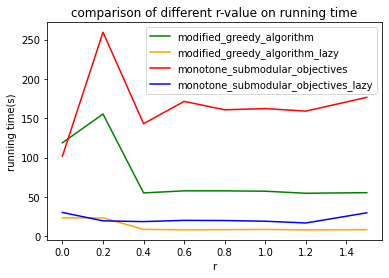

In [27]:
import matplotlib.pyplot as plt
x_axix=[]
for i in rs:
    x_axix.append(i)
plt.title('comparison of different r-value on running time')
plt.plot(x_axix, run_time_modified, color='green', label='modified_greedy_algorithm')
plt.plot(x_axix, run_time_modified_lazy,  color='orange', label='modified_greedy_algorithm_lazy')
plt.plot(x_axix, run_time_monotone,  color='red', label='monotone_submodular_objectives')
plt.plot(x_axix, run_time_monotone_lazy,  color='blue', label='monotone_submodular_objectives_lazy')
plt.legend()
plt.xlabel('r')
plt.ylabel('running time(s)')
plt.show()

可以清楚看到，modified_greedy_algorithm运行时间是要比基于Monotone Submodular Objectives算法要低的，并且经过lazy改进后的两张算法运行时间都比较低，可以说通过lazy使得算法效率改进了若干倍，同时当r取值为0.4-1.4之间时，四种算法的运行效率基本处于稳定状态

比较覆盖率

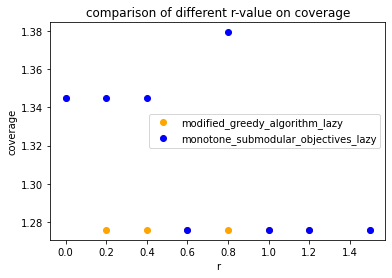

In [28]:
total=X[X_tf.shape[0]-1].sum()
modified_lazy=[]
monotone_lazy=[]
for i in S_MMR_lazy_summary:
    x_MMR_lazy.append(X[i].sum()/total)
for i in sub_lazy_summary:
    x_sub_lazy.append(X[i].sum()/total)
plt.title('comparison of different r-value on coverage')
plt.plot(x_axix, modified_lazy,  'ro',color='orange',  label='modified_greedy_algorithm_lazy')
plt.plot(x_axix, monotone_lazy, 'ro', color='blue',  label='monotone_submodular_objectives_lazy')
plt.legend()
plt.xlabel('r')
plt.ylabel('coverage')
plt.show()

可以看到，基于Monotone Submodular Objectives算法在覆盖率的表现上基本都要比modified-greedy-algorithm好

r=0.8的时候表现整体最优

### 这仅仅是针对第一页的前4篇文章生成的摘要，现在用后面四种方法对400篇文章生成100篇摘要，进而比较随着文章长度的变化，算法运行时间的变化以及覆盖率的变化

In [41]:
def generate_summary(passages,r,modified_greedy_algorithm,modified_greedy_algorithm_lazy,monotone_submodular_objectives,monotone_submodular_objectives_lazy,generate_cluster):
    vec = CountVectorizer()
    X = vec.fit_transform(passages)
    tf_transformer = TfidfTransformer(use_idf=True).fit(X)
    X_tf = tf_transformer.transform(X)
    
    start = time.time()
    modified_greedy_algorithm_S = modified_greedy_algorithm(X,X_tf,MMR,40, r)
    modified_greedy_algorithm_t = time.time() - start
    
    start = time.time()
    modified_greedy_algorithm_lazy_S = modified_greedy_algorithm_lazy(X,X_tf,MMR,40, r)
    modified_greedy_algorithm_lazy_t = time.time() - start
    
    cluster=generate_cluster(X_tf, X,3)
    start = time.time()
    monotone_submodular_objectives_S = monotone_submodular_objectives(X,X_tf,cluster,monotone_submodulars,40, r)
    monotone_submodular_objectives_t = time.time() - start
    
    start = time.time()
    monotone_submodular_objectives_lazy_S = monotone_submodular_objectives(X,X_tf,cluster,monotone_submodulars,40, r)
    monotone_submodular_objectives_lazy_t = time.time() - start
    return X_tf.shape[0],modified_greedy_algorithm_t, modified_greedy_algorithm_lazy_t, monotone_submodular_objectives_t, monotone_submodular_objectives_lazy_t,len(modified_greedy_algorithm_lazy_S)/ X_tf.shape[0],len(monotone_submodular_objectives_lazy_S)/X_tf.shape[0]

In [42]:
import copy
passages=copy.deepcopy(sent) 
column = ['length_of_doc','modified_greedy_algorithm_t', 'modified_greedy_algorithm_lazy_t','monotone_submodular_objectives_t', 'monotone_submodular_objectives_lazy_t','modified_lazy_coverage','monotone_lazy_coverage']
result = pd.DataFrame(np.zeros((len(sent), len(column))),columns=column)
t=0
for i in range(100):
    passages[i]=list(set(passages[i]))
    res=generate_summary(passages[i],0.8,modified_greedy_algorithm,modified_greedy_algorithm_lazy,monotone_submodular_objectives,monotone_submodular_objectives_lazy,generate_cluster)
    for j in range(len(column)):
        result[names[j]].iloc[t] = res[j]
    t=t+1
result[1].to_csv('result.csv')
#results.to_csv('result.csv')

In [29]:
res = pd.read_csv("result.csv", sep = ",")

#### 在不同的文章长度下的运行效率：

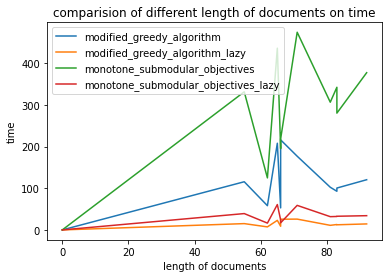

In [30]:
length = np.array(res["length_of_doc"])
length_ = res["length_of_doc"][np.argsort(length)[:-1]]
modified = res["modified_greedy_algorithm_t"][np.argsort(length)[:-1]]
modified_lazy = res["modified_greedy_algorithm_t_lazy"][np.argsort(length)[:-1]]
monotone_lazy = res["monotone_submodular_objectives_t_lazy"][np.argsort(length)[:-1]]
monotone = res["monotone_submodular_objectives_t"][np.argsort(length)[:-1]]

plt.title("comparision of different length of documents on time")
plt.xlabel("length of documents")
plt.ylabel("time")
plt.plot(length_, modified, label = "modified_greedy_algorithm")
plt.plot(length_, modified_lazy, label = "modified_greedy_algorithm_lazy")
plt.plot(length_, monotone, label = "monotone_submodular_objectives")
plt.plot(length_, monotone_lazy, label = "monotone_submodular_objectives_lazy")
plt.legend()
plt.show()

#### 在不同的文章长度下的覆盖率：

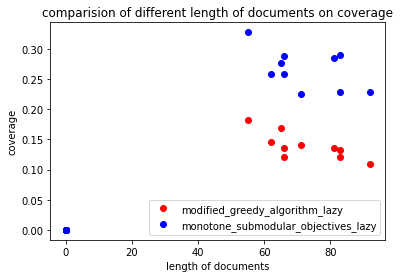

In [31]:
length = np.array(res["length_of_doc"])
length_ = res["length_of_doc"][np.argsort(length)[:-1]]
modified_c = res["modified_lazy_coverage"][np.argsort(length)[:-1]]
monotone_c = res["monotone_lazy_coverage"][np.argsort(length)[:-1]]

plt.title("comparision of different length of documents on coverage")
plt.xlabel("length of documents")
plt.ylabel("coverage")
plt.plot(length_, modified_c,  'ro',label = "modified_greedy_algorithm_lazy")
plt.plot(length_, monotone_c, 'bo', label = "monotone_submodular_objectives_lazy")
plt.legend()
plt.show()